# Manul Detector

Данный ноутбук демонстрирует результаты учебного проекта,
посвящённого распознаванию манула на изображениях дикой природы
с использованием нейросетевой модели YOLOv8.

Проект выполнен в рамках проектной практики.


## Цель и задачи

**Цель:**  
Проверить возможность использования модели YOLOv8
для автоматического обнаружения манула на изображениях.

**Задачи:**
- подготовка и разметка датасета
- обучение модели YOLOv8
- анализ результатов детекции
- визуализация работы модели


In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

## Датасет

Исходный датасет содержал около 130 изображений манула, рыси и дикой кошки.
С использованием аугментации (повороты, отражение, изменение яркости)
объём данных был увеличен до ~320 изображений.

Данные разделены на обучающую, валидационную и тестовую выборки.


Используется модель YOLOv8, дообученная на изображениях манула.


In [2]:
model = YOLO("../models/best_v2.pt")

Пример тестовых изображений

Количество тестовых изображений: 14


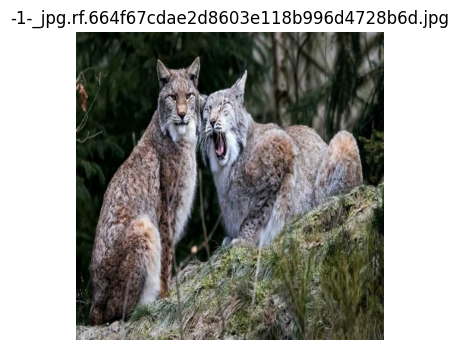

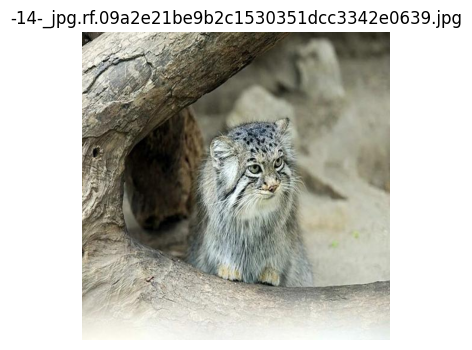

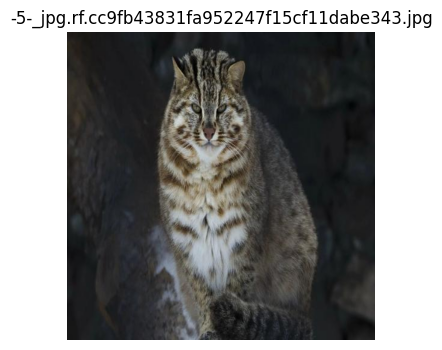

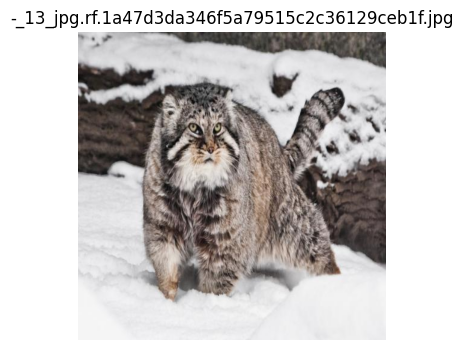

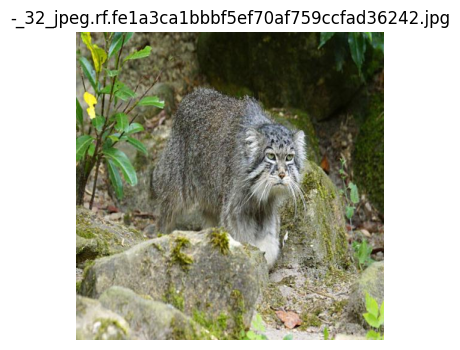

In [3]:
test_dir = Path("../dataset/test/images")
images = list(test_dir.glob("*.jpg"))

print("Количество тестовых изображений:", len(images))

for img_path in images[::3]:
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(img_path.name)
    plt.axis("off")

Детекция манула

In [4]:
results = model(images[::3], conf=0.7)


0: 416x416 2 lynxs, 153.2ms
1: 416x416 1 manul, 153.2ms
2: 416x416 1 lynx, 153.2ms
3: 416x416 1 manul, 153.2ms
4: 416x416 1 manul, 153.2ms
Speed: 22.3ms preprocess, 153.2ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


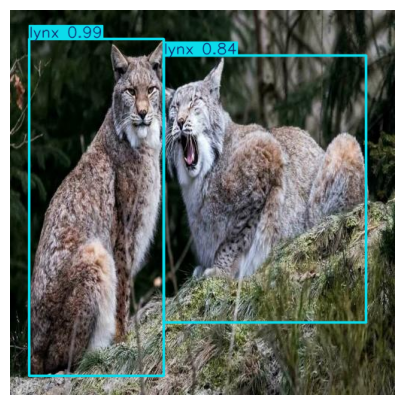

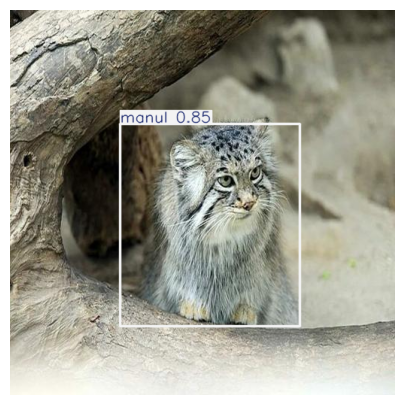

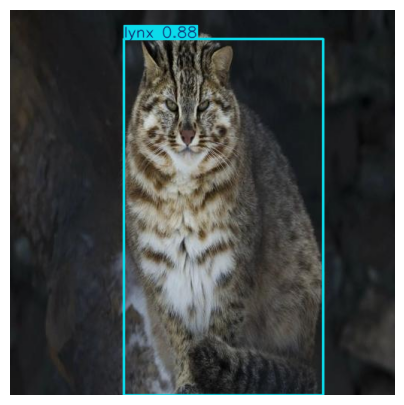

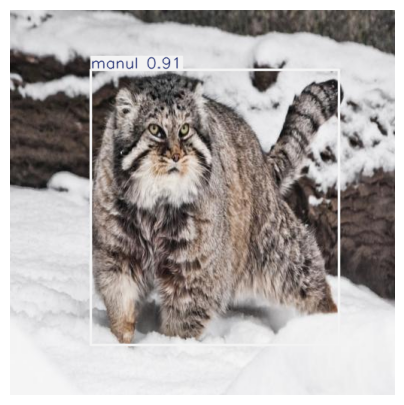

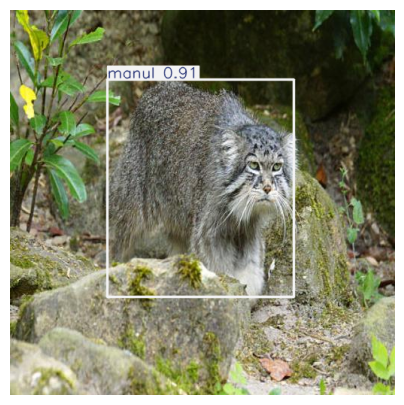

In [5]:
for r in results:
    img = r.plot()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")

Из представленных картинок можно видеть, что только на третьей, вместо дикой кошки (класс cat) модель определила рысь (класс lynx). При этом все манулы с высокой вероятностью детектированы. 

## Результаты обучения


In [6]:
results_df = pd.read_csv("../result_data/results.csv")
results_df.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
25,26,1950.75,0.27836,0.46614,0.88777,0.88027,0.94734,0.96227,0.80009,0.63795,0.79424,1.05300,0.000250,0.000250,0.000250
26,27,2024.11,0.28235,0.44426,0.88340,0.80503,0.88273,0.90477,0.77083,0.60350,0.97419,1.04187,0.000203,0.000203,0.000203
27,28,2099.70,0.26216,0.43005,0.87354,0.79557,0.86433,0.89796,0.77861,0.59641,0.96514,1.03180,0.000156,0.000156,0.000156
28,29,2172.63,0.25033,0.41198,0.87344,0.76335,0.87143,0.87283,0.75072,0.59538,0.88995,1.01854,0.000109,0.000109,0.000109
29,30,2245.55,0.23957,0.39654,0.86288,0.69570,0.91905,0.88206,0.77101,0.58765,0.90167,1.01033,0.000061,0.000061,0.000061


In [7]:
best = results_df.loc[results_df['metrics/mAP50(B)'].idxmax()]

best[['metrics/precision(B)',
      'metrics/recall(B)',
      'metrics/mAP50(B)']]

metrics/precision(B)    0.88027
metrics/recall(B)       0.94734
metrics/mAP50(B)        0.96227
Name: 25, dtype: float64

Модель показывает хорошие значения precision и recall
для учебного проекта при ограниченном объёме данных.


## Анализ ошибок

Основные причины ошибок модели:
- визуальное сходство манула с другими кошачьими
- частичное перекрытие объекта
- сложные условия освещения

Данные ошибки являются ожидаемыми
при небольшом размере обучающей выборки.


## Заключение

В рамках проектной практики была обучена и протестирована модель YOLOv8
для задачи обнаружения манула на изображениях дикой природы.

Результаты показали, что даже при ограниченном объёме данных
модель способна корректно обнаруживать целевой объект.

Проект позволил на практике освоить основные этапы работы
с моделями компьютерного зрения.
